In [5]:
# system information
import os
from glob import glob

# computing 
import numpy as np
import pandas as pd
from datetime import datetime
import scipy as sp
import scipy.optimize as op
import statistics 
import seaborn as sns
from random import uniform, seed, random
# plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
%matplotlib inline

# ROOT files handling
from coffea.nanoevents import NanoEventsFactory, BaseSchema
import uproot as ur

In [6]:
# define ticks

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

# define ticks
def set_ticks(ax, xMaj, yMaj):
    ax.xaxis.set_major_locator(MultipleLocator(xMaj))
    ax.yaxis.set_major_locator(MultipleLocator(yMaj))
    ax.minorticks_on()
    ax.tick_params(which='major', width=1.0, length=8, direction='in', labelsize=14)
    ax.tick_params(which='minor', width=1.0, length=4, direction='in', labelsize=14)
    ax.yaxis.get_offset_text().set_fontsize(14)
    ax.xaxis.get_offset_text().set_fontsize(14)

In [177]:
events = ur.open("art_start.root:pjmca")['ch0'].array()

events = events[events>100]

In [183]:
## 2 giorni - 14 minuti

run_time = 2 * 86400 - 14*60
N_events = len(events)
rate = len(events)/run_time

error = np.sqrt(N_events)/run_time
print("Run time:",run_time)
print("Events:",len(events))
print("Rate:",rate)
print("error:",error)

Run time: 171960
Events: 97217
Rate: 0.5653465922307513
error: 0.0018131914860032884


In [70]:
def running_mean(y_in, x_in, N_out=101, sigma=1):
    '''
    Returns running mean as a Bell-curve weighted average at evenly spaced
    points. Does NOT wrap signal around, or pad with zeros.
    
    Arguments:
    y_in -- y values, the values to be smoothed and re-sampled
    x_in -- x values for array
    
    Keyword arguments:
    N_out -- NoOf elements in resampled array.
    sigma -- 'Width' of Bell-curve in units of param x .
    '''
    N_in = len(y_in)

    # Gaussian kernel
    x_out = np.linspace(np.min(x_in), np.max(x_in), N_out)
    x_in_mesh, x_out_mesh = np.meshgrid(x_in, x_out)
    gauss_kernel = np.exp(-np.square(x_in_mesh - x_out_mesh) / (2 * sigma**2))
    # Normalize kernel, such that the sum is one along axis 1
    normalization = np.tile(np.reshape(np.sum(gauss_kernel, axis=1), (N_out, 1)), (1, N_in))
    gauss_kernel_normalized = gauss_kernel / normalization
    # Perform running average as a linear operation
    y_out = gauss_kernel_normalized @ y_in

    return y_out, x_out


def pol0(x,a):
    return a

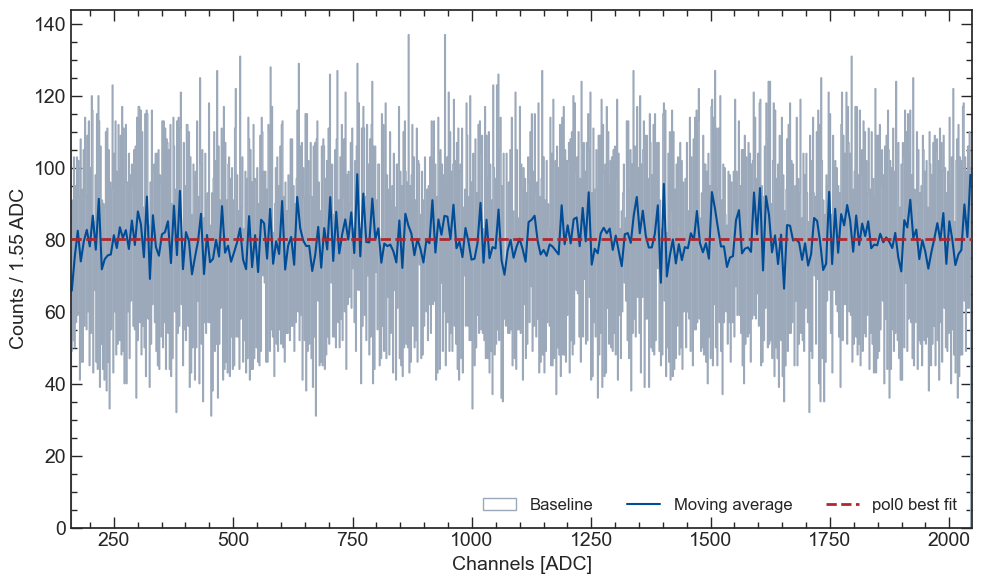

In [171]:
# plot histogram
fig, ax = plt.subplots(figsize=(10,6))

cmap = mpl.cm.get_cmap('Blues_r',8)

nbins = 1212


counts, bins , _ = ax.hist(events, bins=nbins, histtype='step', lw=1, alpha=1, align = 'mid', color='#9BA9BA', label = 'Baseline')

w = bins[1] - bins[0]

edges = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins) - 1)])

y, x = running_mean(counts,edges,300,2)

# perform fit 
par, cov = op.curve_fit(f = pol0, xdata = x, ydata = y )

# create array to plot fit results 
x_g = np.arange(160,2048,0.02)


ax.set_xlim(160,2048)
ax.plot(x,y, ls = '-', color='#004C97', label = 'Moving average')
#ax.plot(x,y, lw = 0, marker = 'o', markersize = 4, mec = 'none', color = 'black')

# plot curve and data points
ax.axhline(par[0], color = '#AF272F', ls='dashed', alpha=1, lw=2, zorder = 100, label = 'pol0 best fit')

ax.set_xlabel("Channels [ADC]", fontsize=14)
ax.set_ylabel("Counts / %1.2f ADC" %w, fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=12, markerscale=5, ncol=3)

set_ticks(ax, 250,20)
fig.tight_layout()
fig.savefig("baseline.pdf", dpi = 200)
plt.show()

In [172]:
par

array([80.23135237])

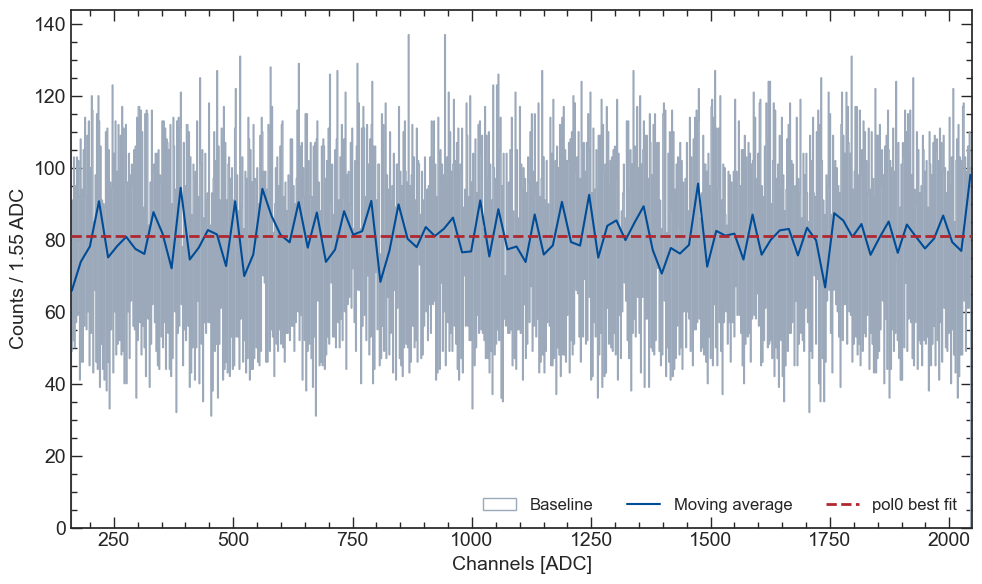

In [169]:
# plot histogram
fig, ax = plt.subplots(figsize=(10,6))

cmap = mpl.cm.get_cmap('Blues_r',8)

nbins = 1212

events = events[events>100]

counts, bins , _ = ax.hist(events, bins=nbins, histtype='step', lw=1, alpha=1, align = 'mid', color='#9BA9BA', label = 'Baseline')

w = bins[1] - bins[0]

edges = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins) - 1)])

y, x = running_mean(counts,edges,100,2)

# perform fit 
par, cov = op.curve_fit(f = pol0, xdata = x, ydata = y )

# create array to plot fit results 
x_g = np.arange(160,2048,0.02)


ax.set_xlim(160,2048)
ax.plot(x,y, ls = '-', color='#004C97', label = 'Moving average')
#ax.plot(x,y, lw = 0, marker = 'o', markersize = 4, mec = 'none', color = 'black')

# plot curve and data points
ax.axhline(par[0], color = '#AF272F', ls='dashed', alpha=1, lw=2, zorder = 100, label = 'pol0 best fit')

ax.set_xlabel("Channels [ADC]", fontsize=14)
ax.set_ylabel("Counts / %1.2f ADC" %w, fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=12, markerscale=5, ncol=3)

set_ticks(ax, 250,20)
fig.tight_layout()
fig.savefig("baseline2.pdf", dpi = 200)
plt.show()

In [175]:
len(events)

97210